In [3]:
from tsne import TSNE, calculate_entropy,  calculate_perplexity

import jax
import jax.numpy as jnp

from utils import plot_features, multimodal_random_generator
from pca import fit_transform

In [4]:
# Generate multimodal data
key = jax.random.PRNGKey(50)
n_samples = 1000
n_features = 10
n_modes = 10  # Number of clusters

random_arr, cluster_assignments = multimodal_random_generator(
    key, shape=(n_samples, n_features), n_modes=n_modes, 
    # minval=10.0, maxval=20
)

# Visualize

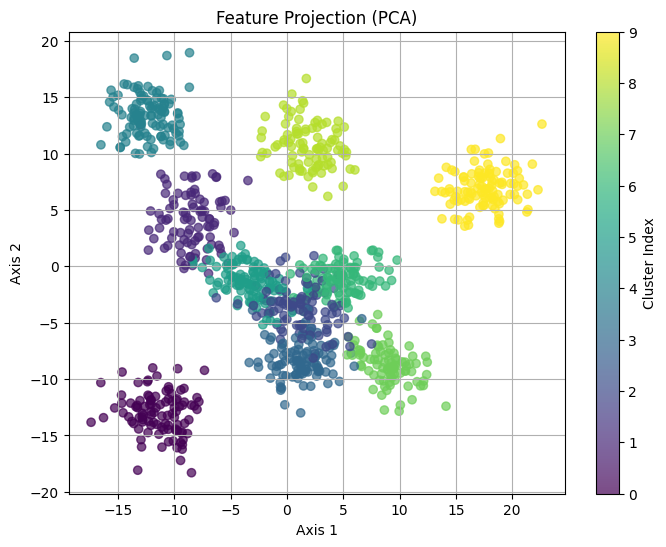

In [5]:
pca_data = fit_transform(random_arr, 2)  # Assuming fit_transform() reduces to 2D
plot_features(pca_data, clusters=cluster_assignments, title='Feature Projection (PCA)')

In [6]:
tsne = TSNE(random_arr, n_components=2, perplexity=40)
outs = tsne.fit(verbose=False)

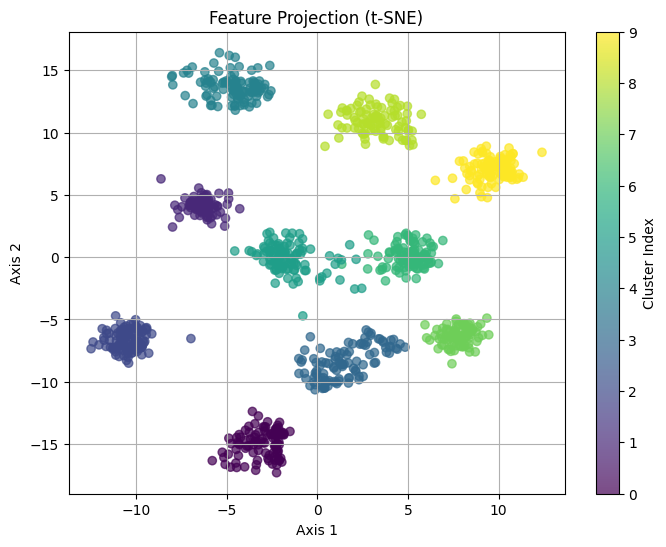

In [7]:
plot_features(tsne.y, clusters=cluster_assignments, title='Feature Projection (t-SNE)')

In [8]:
from sklearn.manifold import TSNE

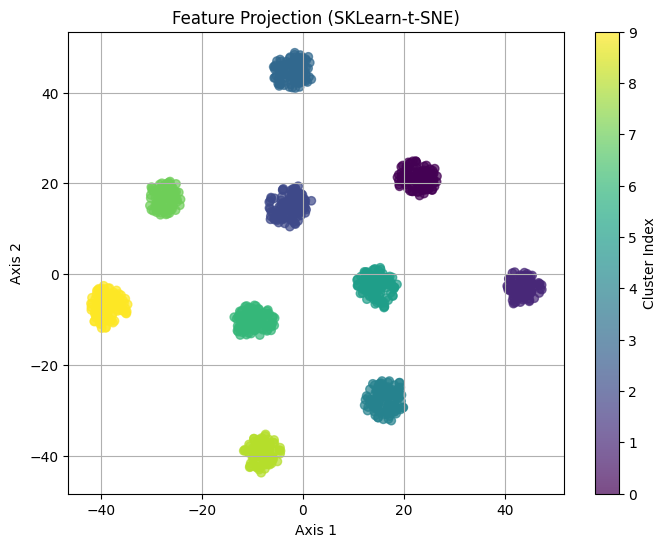

In [11]:
tsne_sklearn = TSNE(n_components=2)
tsne_sklean_y = tsne_sklearn.fit_transform(random_arr)
plot_features(tsne_sklean_y, clusters=cluster_assignments, title='Feature Projection (SKLearn-t-SNE)')

In [15]:
%%timeit
tsne.fit(verbose=False)

145 ms ± 414 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
tsne_sklean_y = tsne_sklearn.fit_transform(random_arr)

1.49 s ± 229 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
